------------------------------------------------------
The total call to the API took 0.18700504302978516 seconds
The city being checked is: mayumba
The latitude being checked is: -3.44
The temperature information received is: 71.79
The humidity information received is: 90
The wind speed information received is: 5.39
The cloud cover information received is: 80
------------------------------------------------------
------------------------------------------------------
The total call to the API took 0.07933902740478516 seconds
The city being checked is: tasiilaq
The latitude being checked is: 65.61
The temperature information received is: 44.6
The humidity information received is: 75
The wind speed information received is: 6.93
The cloud cover information received is: 75
------------------------------------------------------
------------------------------------------------------
The total call to the API took 0.08033895492553711 seconds
The city being checked is: albany
The latitude bei

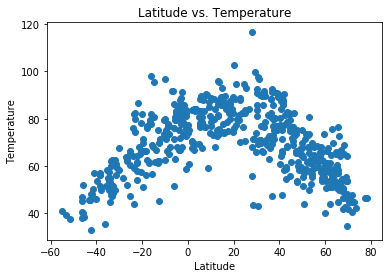

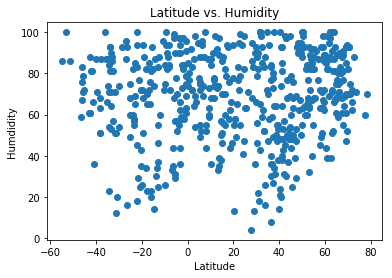

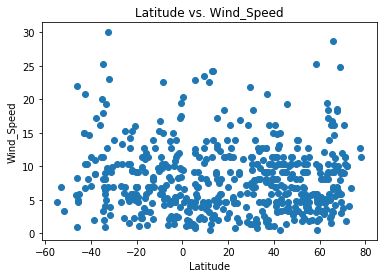

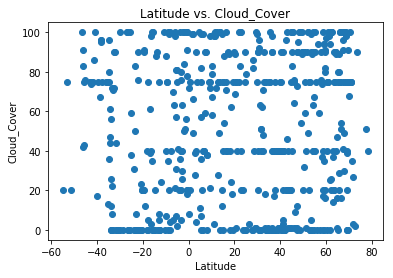

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from citipy import citipy
import time
%matplotlib inline

api_key = "62a3700bc9f71d1a4d2653549c184851"

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="

#%%

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)
#%%

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


#%%
lat = []
temp = []
found_city = []
humidity = []
wind = []
clouds = []

#%%

for city in cities:
    try:
        
        
        t0 = time.time()
        
        ####################################################
        response = requests.get(query_url + city).json()
        lat_checked = response["coord"]["lat"]
        temp_found = response["main"]["temp"]
        humidity_found = response["main"]["humidity"]
        wind_found = response["wind"]["speed"]
        cloud_found = response["clouds"]["all"]
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response["main"]["humidity"])
        wind.append(response["wind"]["speed"])
        clouds.append(cloud_found)
        found_city.append(city)
        ####################################################
        
        t1 = time.time()
        total = t1-t0
        
        print("------------------------------------------------------")
        print(f"The total call to the API took {total} seconds")
        print(f"The city being checked is: {city}")
        print(f"The latitude being checked is: {lat_checked}")
        print(f"The temperature information received is: {temp_found}")
        print(f"The humidity information received is: {humidity_found}")
        print(f"The wind speed information received is: {wind_found}")
        print(f"The cloud cover information received is: {cloud_found}")
        print("------------------------------------------------------")
    except:
        continue
    
    
#%%

        
main_zipped = list(zip(found_city,lat,temp,humidity,wind,clouds ))    
main_zipped_df = pd.DataFrame(main_zipped,index=found_city,columns=["City","Lat","Temp","Humidity","Wind","Clouds"])
main_zipped_df.drop("City",axis=1,inplace=True)

main_zipped

#%%   
 
zipped = list(zip(found_city,lat,temp))

zipped_df = pd.DataFrame(zipped, index=found_city,columns=["City","Lat","Temp"])

zipped_df.drop("City",axis=1,inplace=True)


plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature")

plt.scatter(zipped_df["Lat"], zipped_df["Temp"])
plt.show()
#%%

zipped = list(zip(found_city, lat, humidity ))

zipped_df = pd.DataFrame(zipped, index=found_city,columns=["City","Lat","Humidity"])

zipped_df.drop("City",axis=1,inplace=True)


plt.xlabel("Latitude")
plt.ylabel("Humdidity")
plt.title("Latitude vs. Humidity")

plt.scatter(zipped_df["Lat"], zipped_df["Humidity"])
plt.show()
#%%

zipped = list(zip(found_city, lat, wind ))

zipped_df = pd.DataFrame(zipped, index=found_city,columns=["City","Lat","Wind_Speed"])

zipped_df.drop("City",axis=1,inplace=True)


plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Latitude vs. Wind_Speed")

plt.scatter(zipped_df["Lat"], zipped_df["Wind_Speed"])
plt.show()

#%%

zipped = list(zip(found_city, lat, clouds ))

zipped_df = pd.DataFrame(zipped, index=found_city,columns=["City","Lat","Cloud_Cover"])

zipped_df.drop("City",axis=1,inplace=True)


plt.xlabel("Latitude")
plt.ylabel("Cloud_Cover")
plt.title("Latitude vs. Cloud_Cover")

plt.scatter(zipped_df["Lat"], zipped_df["Cloud_Cover"])
plt.show()


#%%
#main_zipped_df.to_csv("Weather_Info.csv")